In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Set random seed
np.random.seed(42)

# Create dummy data
x = pd.Series(np.random.normal(loc=10, scale=2, size=10))
x

0    10.993428
1     9.723471
2    11.295377
3    13.046060
4     9.531693
5     9.531726
6    13.158426
7    11.534869
8     9.061051
9    11.085120
dtype: float64

In [2]:
MR = [np.nan]

# Get and append moving ranges
i = 1
for data in range(1, len(x)):
    MR.append(abs(x[i] - x[i-1]))
    i += 1

# Convert list to pandas Series objects    
MR = pd.Series(MR)

# Concatenate mR Series with and rename columns
data = pd.concat([x,MR], axis=1).rename(columns={0:"x", 1:"mR"})
data

,x,mR
0,10.993428,NaN
1,9.723471,1.269957
2,11.295377,1.571906
3,13.046060,1.750683
4,9.531693,3.514366
5,9.531726,0.000033
6,13.158426,3.626700
7,11.534869,1.623556
8,9.061051,2.473818
9,11.085120,2.024069


[Text(0.5, 0, 'Unit'), Text(0, 0.5, 'Range')]

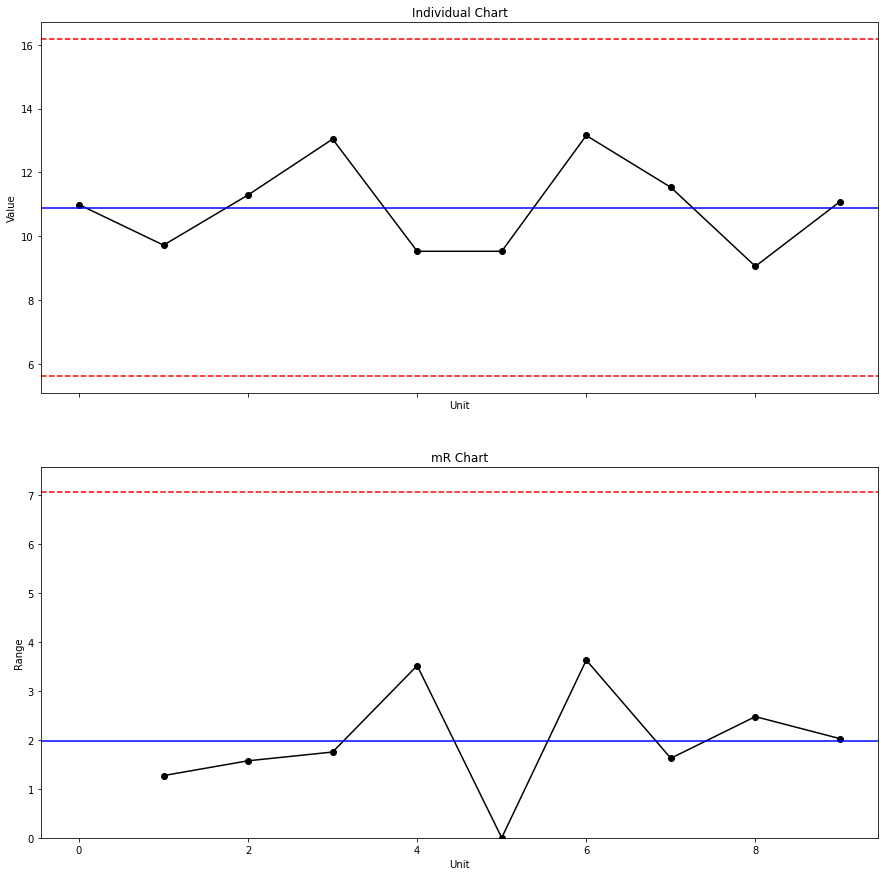

In [3]:
fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)

# x chart
axs[0].plot(data['x'], linestyle='-', marker='o', color='black')
axs[0].axhline(statistics.mean(data['x']), color='blue')
axs[0].axhline(statistics.mean(data['x'])+3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128, color = 'red', linestyle = 'dashed')
axs[0].axhline(statistics.mean(data['x'])-3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128, color = 'red', linestyle = 'dashed')
axs[0].set_title('Individual Chart')
axs[0].set(xlabel='Unit', ylabel='Value')

# mR chart
axs[1].plot(data['mR'], linestyle='-', marker='o', color='black')
axs[1].axhline(statistics.mean(data['mR'][1:len(data['mR'])]), color='blue')
axs[1].axhline(statistics.mean(data['mR'][1:len(data['mR'])])+3*statistics.mean(data['mR'][1:len(data['mR'])])*0.8525, color='red', linestyle ='dashed')
axs[1].axhline(statistics.mean(data['mR'][1:len(data['mR'])])-3*statistics.mean(data['mR'][1:len(data['mR'])])*0.8525, color='red', linestyle ='dashed')
axs[1].set_ylim(bottom=0)
axs[1].set_title('mR Chart')
axs[1].set(xlabel='Unit', ylabel='Range')


In [4]:
i = 0
control = True
for unit in data['x']:
    if unit > statistics.mean(data['x'])+3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128 or unit < statistics.mean(data['x'])-3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128:
        print('Unit', i, 'out of cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    

All points within control limits.


In [5]:
i = 0
control = True
for unit in data['mR']:
    if unit > statistics.mean(data['mR'][1:len(data['mR'])])+3*statistics.mean(data['mR'][1:len(data['mR'])])*0.8525 or unit < statistics.mean(data['mR'][1:len(data['mR'])])-3*statistics.mean(data['mR'][1:len(data['mR'])])*0.8525:
        print('Unit', i, 'out of control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.
